# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Import general packages and YLXPS-related packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os 
import scipy
import importlib
import datetime as dt
import pandas as pd

plt.style.use('../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../purity-monitor/')
sys.path.insert(0, '../analysis/')
import HelperClasses as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [3]:
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../analysis\\PlotFunctions.py'>

# Data Read-In

 | Filename... C:/Data/20210409\XeGas_Au-Thorslabs_C-20V_A-200V_1.h5
 | Number of files in ch1...	 11/11
 | Number of files in ch2...	 11/11
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  2.28125 sec


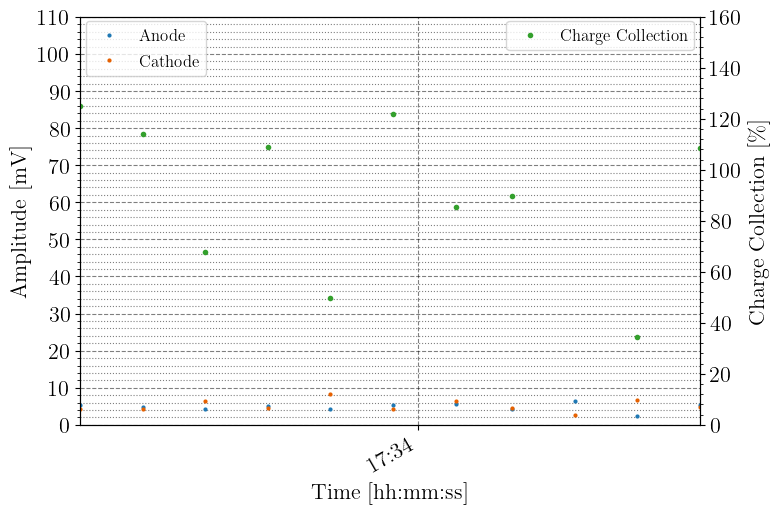

In [4]:
D1 = Dataset.Dataset(Path='C:/Data/20210409/', Selection='XeGas*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=10, YMax=110)

In [5]:
D1.Ch[0].FitParameters = np.array(D1.Ch[0].FitParameters)
label = ['Baseline [mV]', 'Amplitude [mV]', 'Start time [$\mu$s]', 'Fall time [$\mu$s]', 'Rise time [$\mu$s]']
for ii in range(5):
    plt.figure()
    plt.hist(D1.Ch[0].FitParameters[:,ii], bins=30)
    plt.ylabel('Counts')
    plt.xlabel(label[ii])
    plt.savefig('%d.png' % ii, dpi=300, bbox_inches='tight')

AttributeError: 'WFM' object has no attribute 'FitParameters'

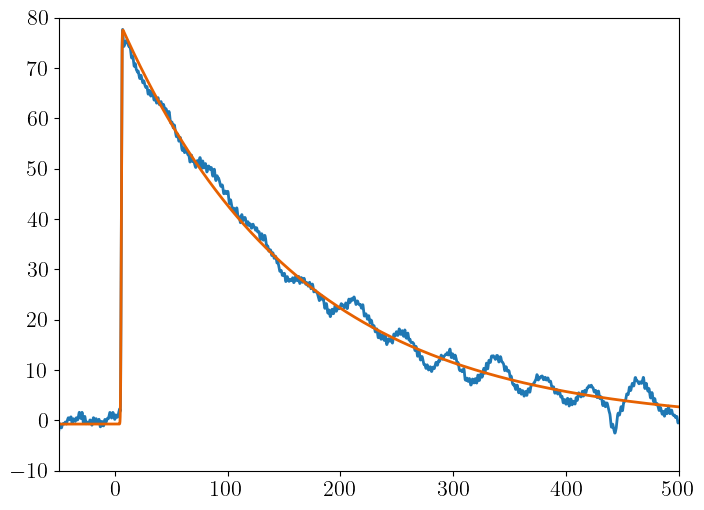

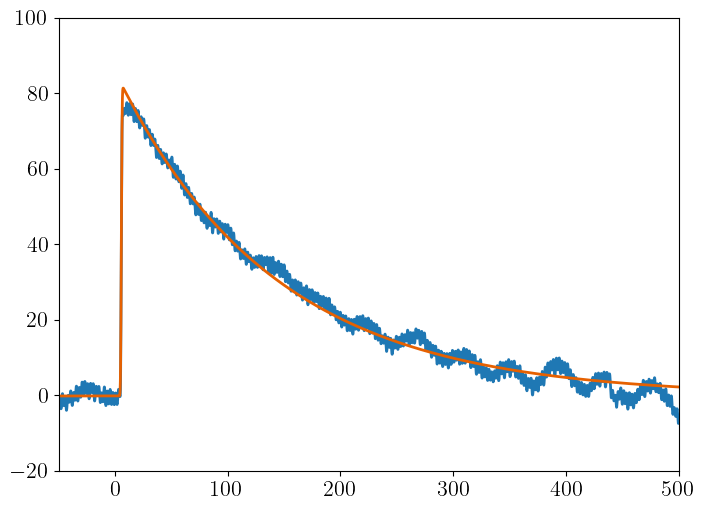

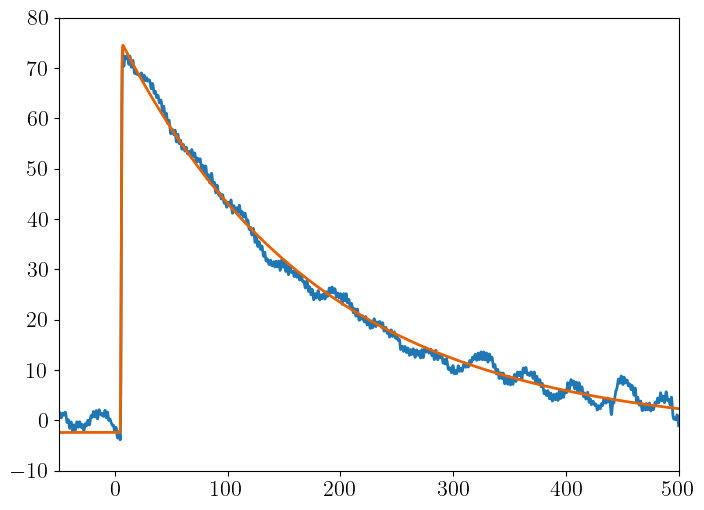

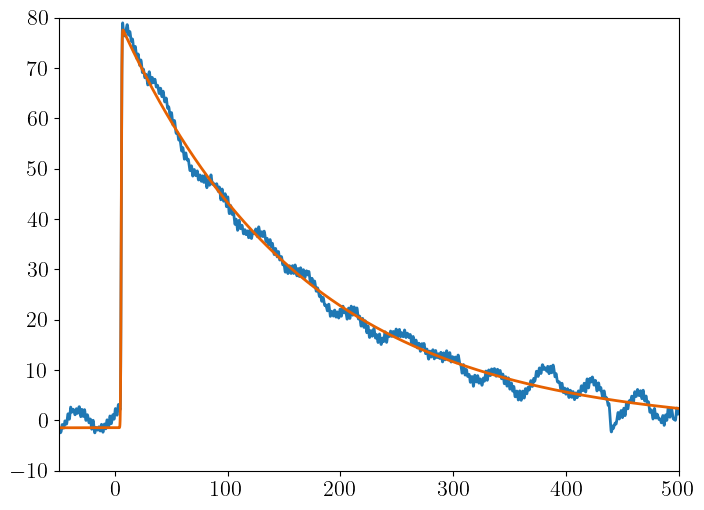

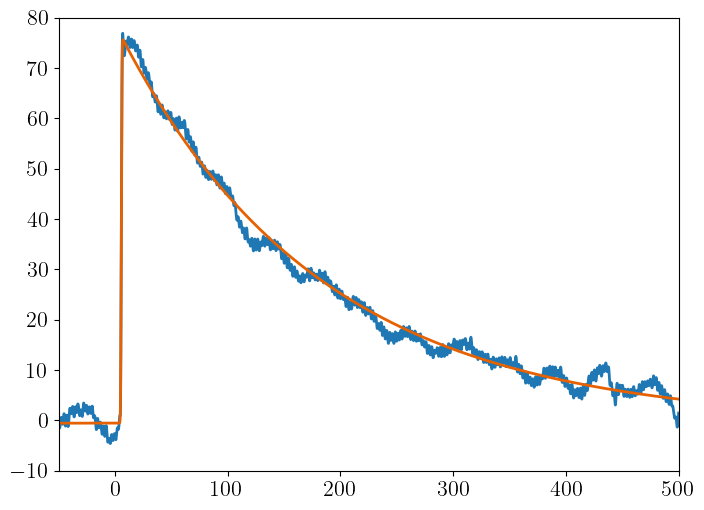

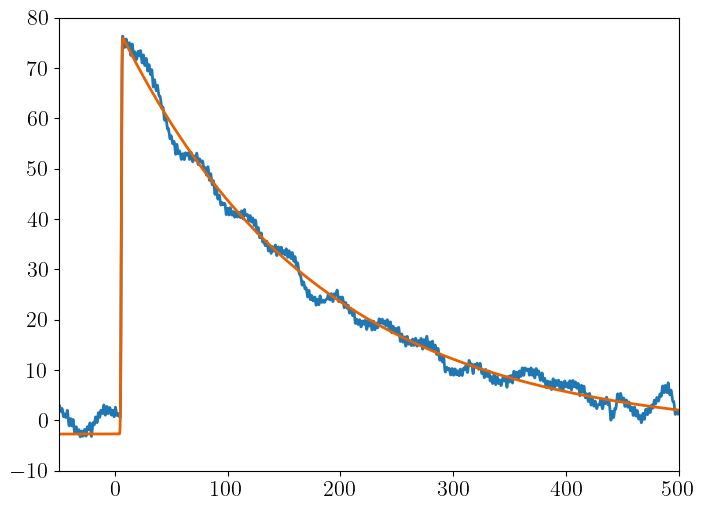

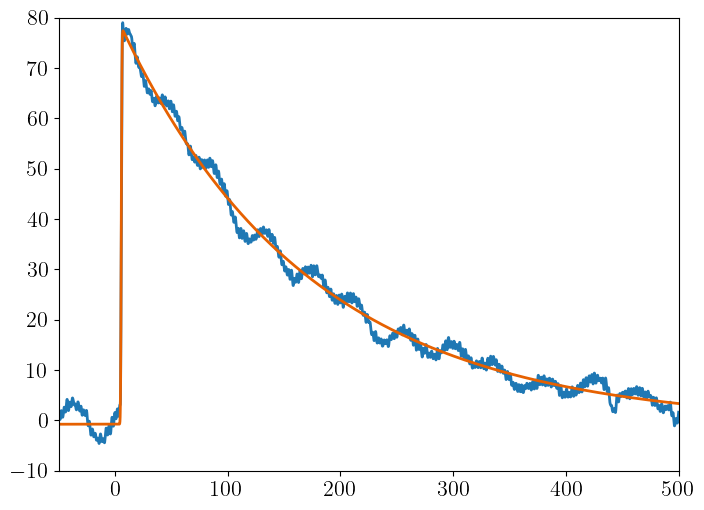

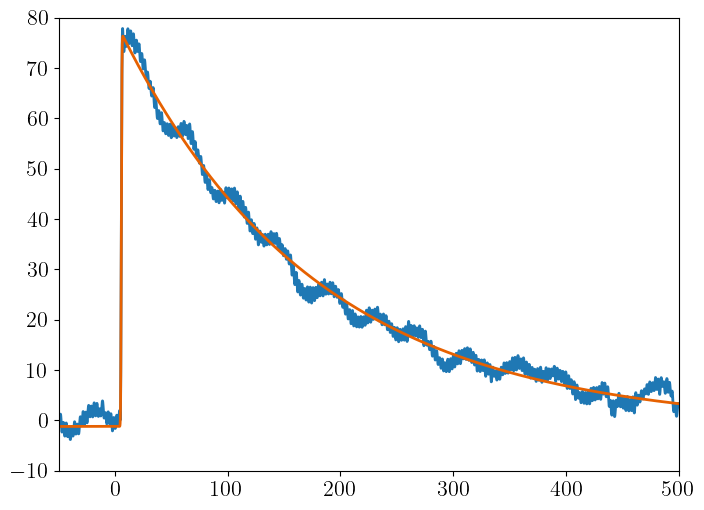

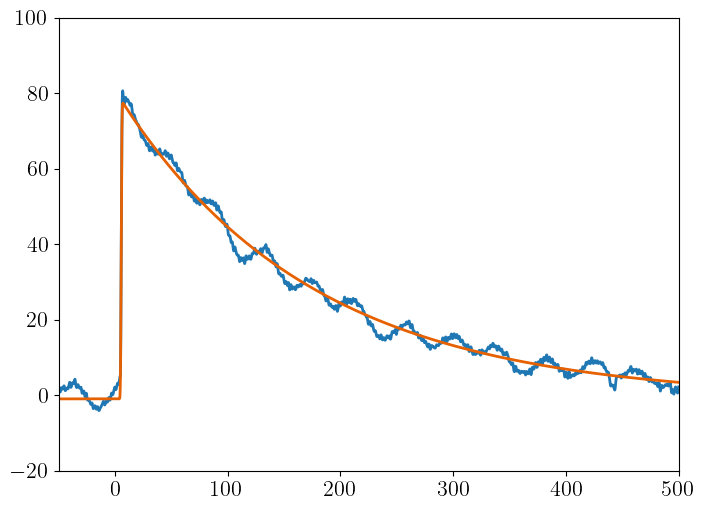

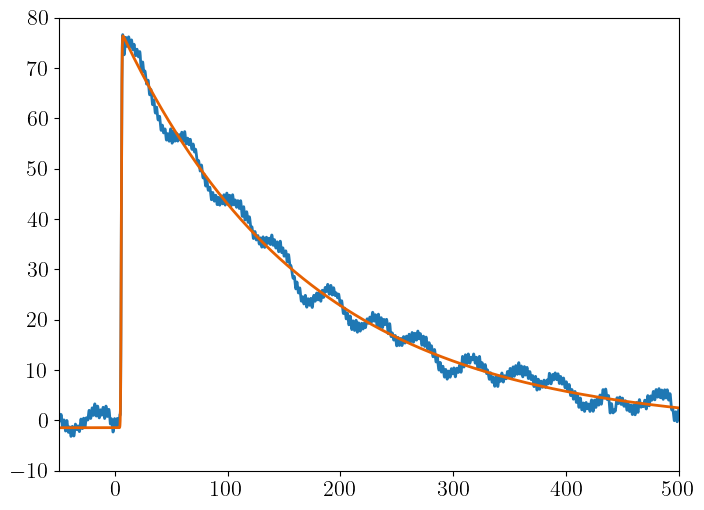

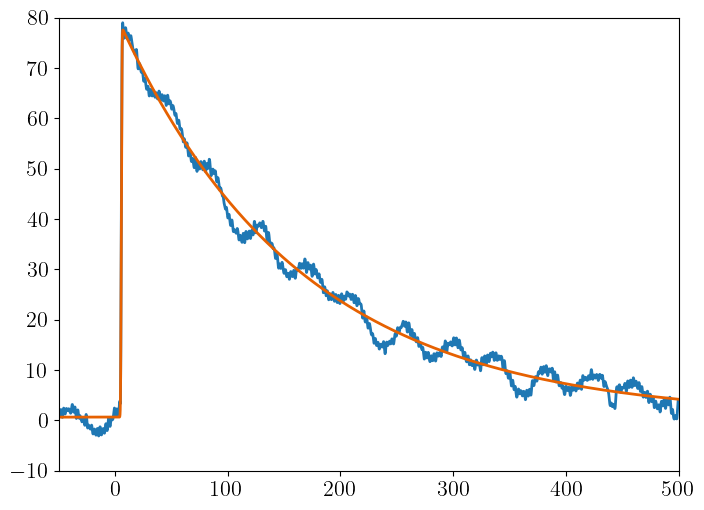

In [9]:
for ii, data in enumerate(D1.Ch[0].Amp):
    if ii>10:
        break
    plt.figure()
    plt.xlim(-50,500)
    plt.plot(D1.Ch[0].Time, data)
    plt.plot(D1.Ch[0].Time, D1.Ch[0].func(D1.Ch[0].Time, *D1.Ch[0].FitParameters[ii]))

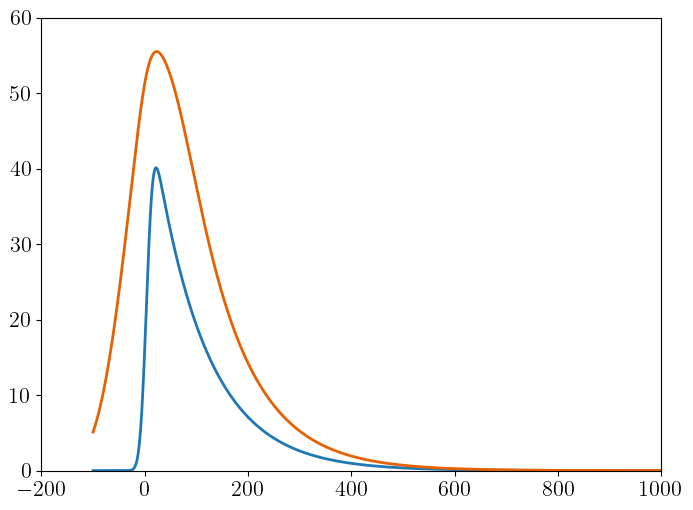

In [55]:
from scipy.special import erfc
from scipy.optimize import curve_fit
def func(x,Base,V0,sigma,tau,mu):
    return Base + V0/2.0 * np.exp(0.5 * (sigma/tau)**2 - (x-mu)/tau) * erfc(1/np.sqrt(2) * (sigma/tau - (x-mu)/sigma))


def func2(x,a,b,c,d,e,f,g,h):
    return a*(1 + erfc(- (x-b)/(c*np.sqrt(2)) ) * np.exp(- (x-b)/d  ) ) + e + f*np.exp(-(x-b)**2/2/h**2)

x = np.linspace(-100,1000,10000)
ttime = D1.Ch[0].Time
plt.plot(x, func(x,0,50,10,100,4))
plt.plot(x, func2(x,50,5,50,100,-50,3,2,20))
# plt.xlim(-50,300)

0
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 29.39531476   5.65811571   0.69339332 162.79493862 -29.07183057
  -1.98785188   5.          13.17584586]
[  0.28849109  58.13330318   0.68461107 164.7395283    5.72020783]


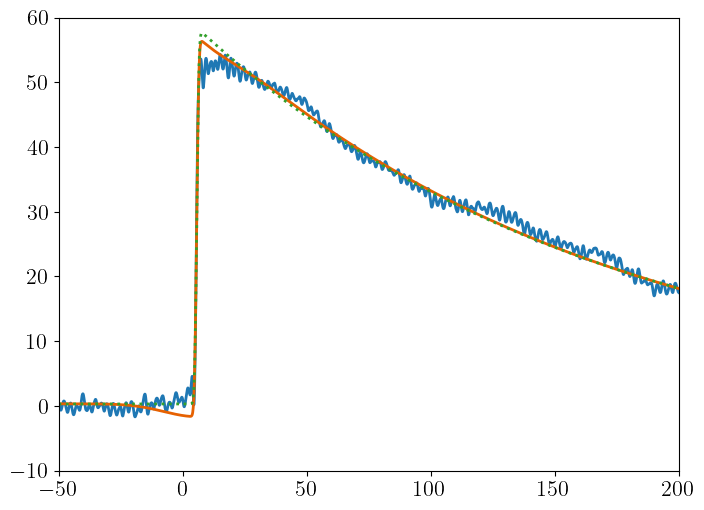

1
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 29.19799816   5.65505922   0.67360038 163.15965416 -29.27947867
  -3.7371748    5.          -7.01304758]
[-1.18252394e-01  5.77190616e+01  6.96018468e-01  1.65241026e+02
  5.78873716e+00]


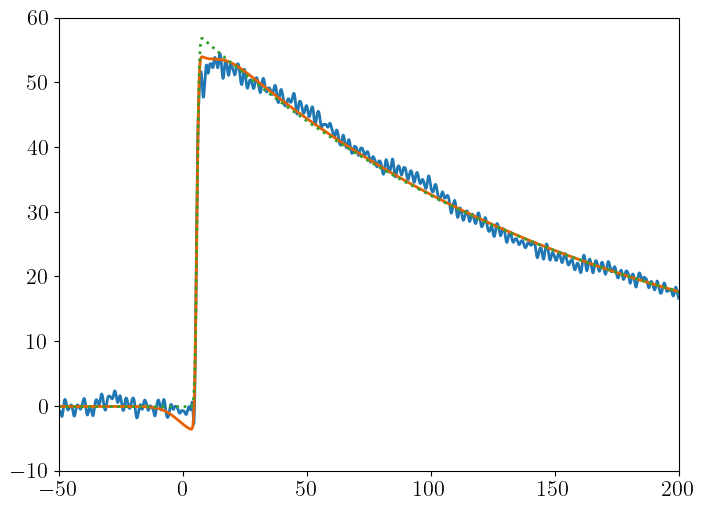

2
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 30.33555023   5.68811783   0.57533487 153.28643434 -30.42149811
  -2.21738566   5.           4.45649309]
[-9.78136367e-02  6.04086051e+01  5.78440832e-01  1.53943073e+02
  5.74985551e+00]


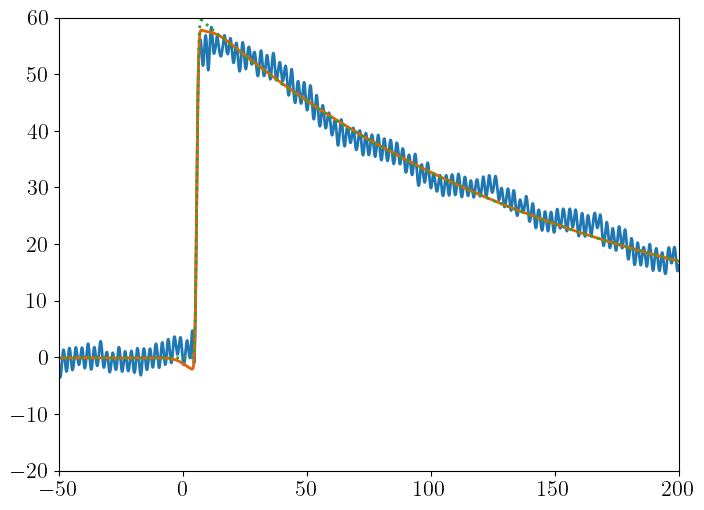

3
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 32.11293553   5.65977867   0.68423592 134.49847695 -32.34002212
  -5.2992705    5.          12.258586  ]
[ -0.30252985  62.38382437   0.71055886 138.29937062   5.81768905]


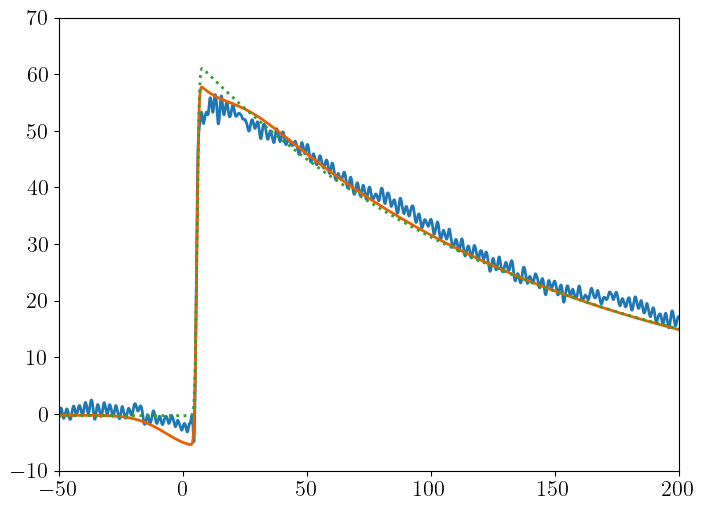

4
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 30.5832646    5.70091411   0.57683926 173.70381636 -34.3115047
   4.5754942    5.         470.32116519]
[ -1.54420809  64.05996835   0.63502051 179.21158785   5.6776525 ]


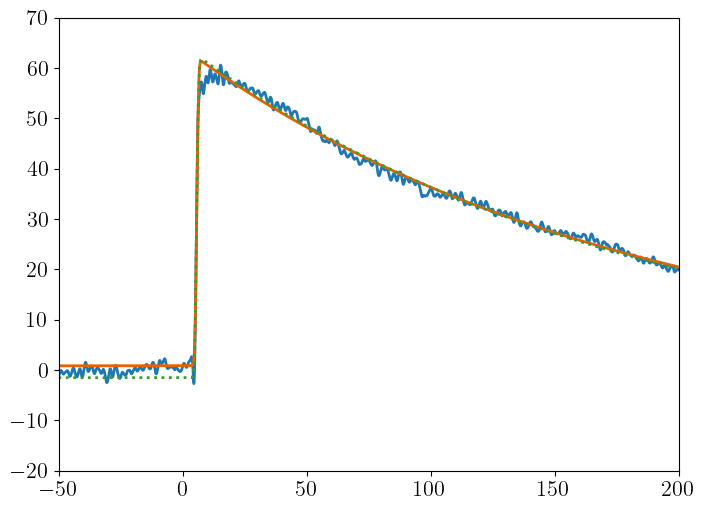

5
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 30.64678274   5.71716583   0.62343343 172.50743068 -31.28986818
   0.73858214   5.         -57.85367396]
[ -0.59289017  62.05137857   0.63533854 170.47471967   5.70569956]


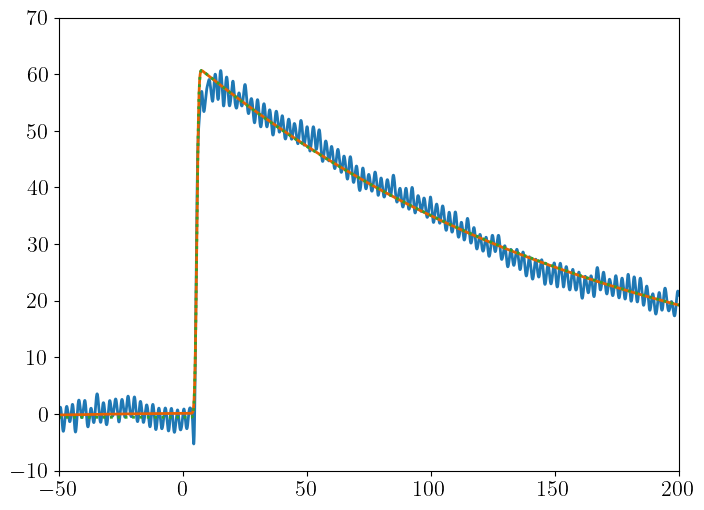

6
C:\Users\nEXO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[ 32.21077922   5.70756948   0.63487692 164.73688573 -31.71859726
  -0.58443688   5.          49.85856468]
[  0.45936587  63.87576034   0.62409714 166.04894872   5.71369956]


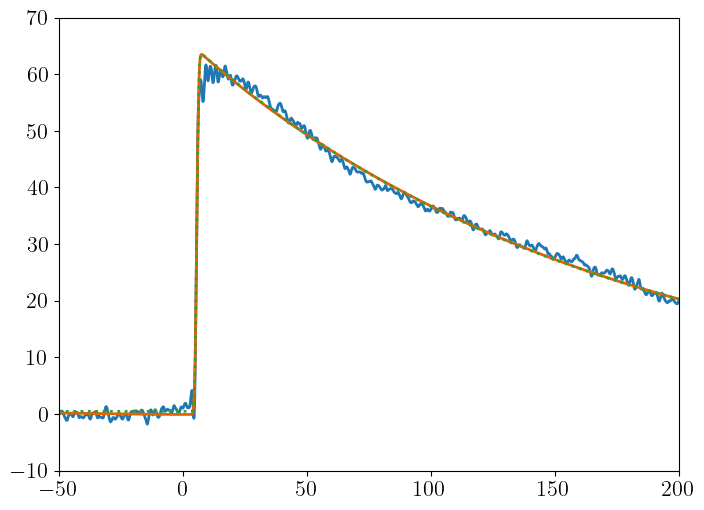

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

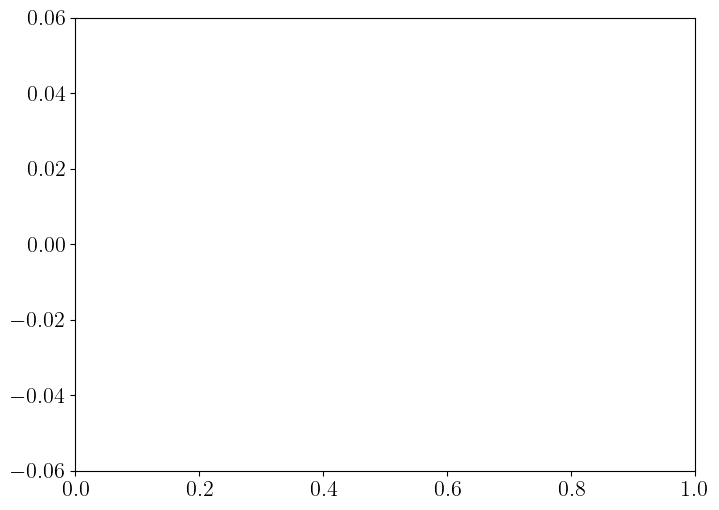

In [58]:
max_data = []
max_filt = []
for ii,data in enumerate(D1.Ch[0].Amp): 
    print(ii)
    # b, a = scipy.signal.butter(3, 0.01, 'lowpass')
    # filtered = scipy.signal.lfilter(b, a, data)
    popt2, pcov2 = curve_fit(func2, ttime, data, p0=[np.max(data),5,5,100,0,10,5,20])
    popt, pcov = curve_fit(func, ttime, data, p0=[np.max(data),5,5,100,0])
    print(popt2)
    print(popt)

    plt.figure()
    plt.xlim(-50,200)
    plt.plot(ttime,data)
    plt.plot(x, func2(x,*popt2))
    plt.plot(x, func(x,*popt), ls=':')

    plt.show()

    if ii>5:
        break

plt.hist(max_data)